<a href="https://colab.research.google.com/github/LuisYurovich/Mentoria_16_Analisis_Inteligente_de_Jugadores/blob/main/TP4_Mentoria_16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Diplomatura en Ciencia de Datos
---
## Mentorias N°16. Grupo 2
## Analisis inteligente de jugadores de un reconocido juego electronico


# Trabajo Práctico 4

**Integrantes:**


* Luis Federico Yurovich

* Nicolás Nazareno Rosales

* Rocío Martinez

In [ ]:
import pandas as pd
import numpy as np
import pandas as pd
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',1000)
import itertools
import warnings
warnings.filterwarnings("ignore")
import io
from tqdm import tqdm
from plotly.offline import init_notebook_mode, plot,iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
import matplotlib.pyplot as plt
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization
import seaborn as sns
from sklearn import metrics
from sklearn.cluster import KMeans,MeanShift
from sklearn import decomposition
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics import calinski_harabasz_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
url="/content/drive/Shareddrives/Análisis Inteligente de Jugadores de Reconocido Juego Electrónico/Rocio-Luis-Nicolas/TP N°3 /df_sn.csv"
df= pd.read_csv(url, sep = ',', index_col= 0)

In [ ]:
df

,id,number_of_records,has_studies,country,gender,state,year_of_birth,min_cups,mean_cups,max_cups,first_cup,last_cup,age_aprox
0,Player-1,868,t,Venezuela,Hombre,Miranda,1997.0,1019,1100.533410,1211,1052,1105,25.0
1,Player-2,4199,t,Venezuela,Hombre,Miranda,2003.0,1027,1296.185520,1559,1226,1322,19.0
2,Player-3,7243,t,Argentina,Hombre,Chubut,1996.0,0,1205.839431,1859,0,1511,26.0
3,Player-4,1326,t,Venezuela,Hombre,Anzoategui,1996.0,752,1003.906486,1221,883,1079,26.0
4,Player-5,869,t,Argentina,Hombre,Buenos Aires,1995.0,261,775.706559,1200,999,1200,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1427,Player-1428,9395,t,Venezuela,Hombre,Monagas,2000.0,0,1111.672698,1724,0,1137,22.0
1428,Player-1429,15228,t,Argentina,Hombre,Buenos Aires,2000.0,0,1245.974521,1856,0,1375,22.0
1429,Player-1430,47,t,Argentina,Hombre,Buenos Aires,2003.0,1146,1148.234043,1176,1146,1176,19.0
1430,Player-1431,1505,t,Argentina,Hombre,Buenos Aires,1997.0,1085,1260.233887,1421,1363,1240,25.0


In [ ]:
df.drop(columns='year_of_birth')

,id,number_of_records,has_studies,country,gender,state,min_cups,mean_cups,max_cups,first_cup,last_cup,age_aprox
0,Player-1,868,t,Venezuela,Hombre,Miranda,1019,1100.533410,1211,1052,1105,25.0
1,Player-2,4199,t,Venezuela,Hombre,Miranda,1027,1296.185520,1559,1226,1322,19.0
2,Player-3,7243,t,Argentina,Hombre,Chubut,0,1205.839431,1859,0,1511,26.0
3,Player-4,1326,t,Venezuela,Hombre,Anzoategui,752,1003.906486,1221,883,1079,26.0
4,Player-5,869,t,Argentina,Hombre,Buenos Aires,261,775.706559,1200,999,1200,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1427,Player-1428,9395,t,Venezuela,Hombre,Monagas,0,1111.672698,1724,0,1137,22.0
1428,Player-1429,15228,t,Argentina,Hombre,Buenos Aires,0,1245.974521,1856,0,1375,22.0
1429,Player-1430,47,t,Argentina,Hombre,Buenos Aires,1146,1148.234043,1176,1146,1176,19.0
1430,Player-1431,1505,t,Argentina,Hombre,Buenos Aires,1085,1260.233887,1421,1363,1240,25.0


Verificamos que el dataset no contenga valores nulos

In [ ]:
df.isna().sum()

id                   0
number_of_records    0
has_studies          0
country              0
gender               0
state                0
year_of_birth        0
min_cups             0
mean_cups            0
max_cups             0
first_cup            0
last_cup             0
age_aprox            0
dtype: int64

Analizamos las métricas

In [ ]:
df.describe()

,number_of_records,year_of_birth,min_cups,mean_cups,max_cups,first_cup,last_cup,age_aprox
count,1432.000000,1432.000000,1432.000000,1432.000000,1432.000000,1432.000000,1432.000000,1432.000000
mean,3048.474162,1997.060056,603.311453,1131.915333,1415.086592,714.379888,1180.563547,24.939944
std,3577.377764,5.745161,498.881502,230.706357,280.287440,585.905024,236.449950,5.745161
min,1.000000,1959.000000,0.000000,82.152847,239.000000,0.000000,239.000000,0.000000
25%,406.000000,1995.000000,0.000000,1025.028755,1200.000000,0.000000,1041.750000,21.000000
50%,1444.500000,1998.000000,818.000000,1162.435415,1400.000000,999.000000,1195.500000,24.000000
75%,4476.250000,2001.000000,1023.000000,1271.060248,1609.250000,1200.000000,1307.250000,27.000000
max,15746.000000,2022.000000,1795.000000,2259.163734,2866.000000,2092.000000,2476.000000,63.000000


Se observa que se mantuvo un error en los features "age_aprox" y "year_of_birth", ya que hay casos de jugadores con edades de 0 y 1 año de vida (lo cual es absurdo) y en consecuencia estos jugadores aparecen como nacidos en los años 2021 y 2022. Para estos casos, reemplazaremos esos valores por la moda.

In [ ]:
print(df.age_aprox.mode())
print(df.year_of_birth.mode())

0    22.0
dtype: float64
0    2000.0
dtype: float64


In [ ]:
df["age_aprox"]=df["age_aprox"].replace([0.,1.],[22.,22.])

In [ ]:
df.age_aprox.describe()

count    1432.000000
mean       25.014665
std         5.564230
min        13.000000
25%        21.000000
50%        24.000000
75%        27.000000
max        63.000000
Name: age_aprox, dtype: float64

In [ ]:
df["year_of_birth"]=df["year_of_birth"].replace([2022.,2021.],[2000.,2000.])

In [ ]:
df.year_of_birth.describe()

count    1432.000000
mean     1996.985335
std         5.564230
min      1959.000000
25%      1995.000000
50%      1998.000000
75%      2001.000000
max      2009.000000
Name: year_of_birth, dtype: float64

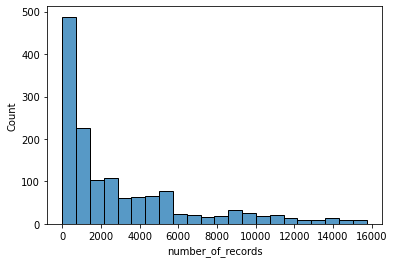

In [ ]:
import seaborn
seaborn.histplot(data=df, x="number_of_records") 

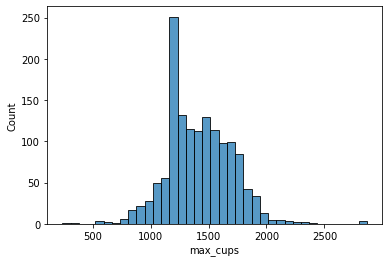

In [ ]:
import seaborn
seaborn.histplot(data=df, x="max_cups") 

##Sección 1: K medias

**(1) Determinar el número óptimo de clusters (k) para utilizar el algoritmo de K medias/ K means. Utilizar el
método del codo (también conocido como Elbow) y el método de la silueta.**

**Método del codo**

Una forma de seleccionar la cantidad más adecuada de clusters es probar varias cantidades y usar el criterio del codo: "elbow method", utilizando una medida de ajuste que puede ser Inertia.

In [ ]:
ratings = ['number_of_records','min_cups','mean_cups','max_cups','first_cup','last_cup']

print(len(ratings), 'variables numéricas: características del jugador')

df_ratings=df[ratings]

6 variables numéricas: características del jugador


La idea básica de los algoritmos de clustering es la minimización de la varianza intra-cluster y la maximización de la varianza inter-cluster. Es decir, queremos que cada observación se encuentre muy cerca a las de su mismo grupo y los grupos lo más lejos posible entre ellos.

El método del codo utiliza la distancia media de las observaciones a su centroide. Es decir, se fija en las distancias intra-cluster. Cuanto más grande es el número de clusters k, la varianza intra-cluster tiende a disminuir. Cuanto menor es la distancia intra-cluster mejor, ya que significa que los clústers son más compactos. El método del codo busca el valor k que satisfaga que un incremento de k, no mejore sustancialmente la distancia media intra-cluster.

Text(0.5, 1.0, 'Inertia of k-Means versus number of clusters')

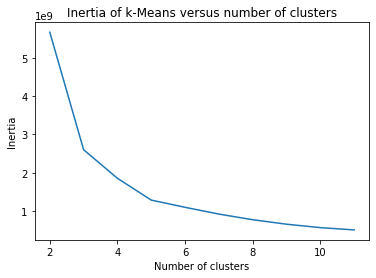

In [ ]:
scores = [KMeans(n_clusters=i).fit(df_ratings).inertia_ for i in range(2,12)]

plt.plot(np.arange(2, 12), scores)
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of k-Means versus number of clusters")

**Método de la silueta**

El análisis de la silueta mide la calidad del agrupamiento o clustering. Mide la distancia de separación entre los clústers. Nos indica cuna cerca está cada punto de un clúster a puntos de los clústers vecinos. Esta medida de distancia se encuentra en el rango [-1, 1]. Un valor alto indica un buen clustering.

Los coeficientes de silueta cercanos a +1 indican que la observación se encuentra lejos de los clústers vecinos. Un valor del coeficiente de 0 indica que la observación está muy cerca o en la frontera de decisión entre dos clústers. Valores negativos indican que esas muestras quizás estén asignadas al clúster erróneo.

El método de la silueta calcula la media de los coeficientes de silueta de todas las observaciones para diferentes valores de k. El número óptimo de clústers k es aquel que maximiza la media de los coeficientes de silueta para un rango de valores de k.

8it [00:11,  1.43s/it]


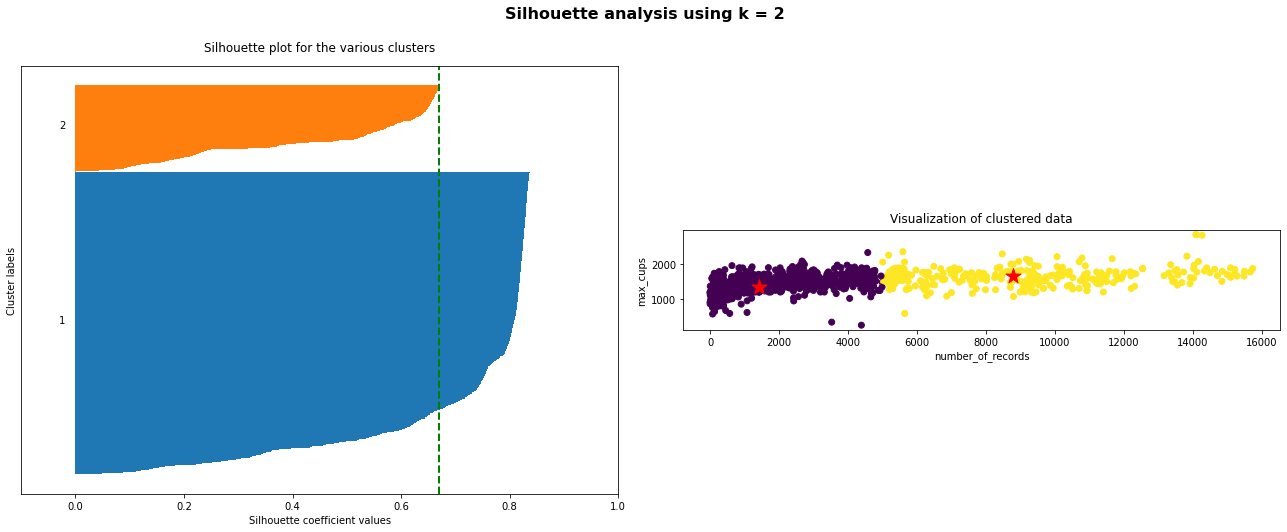

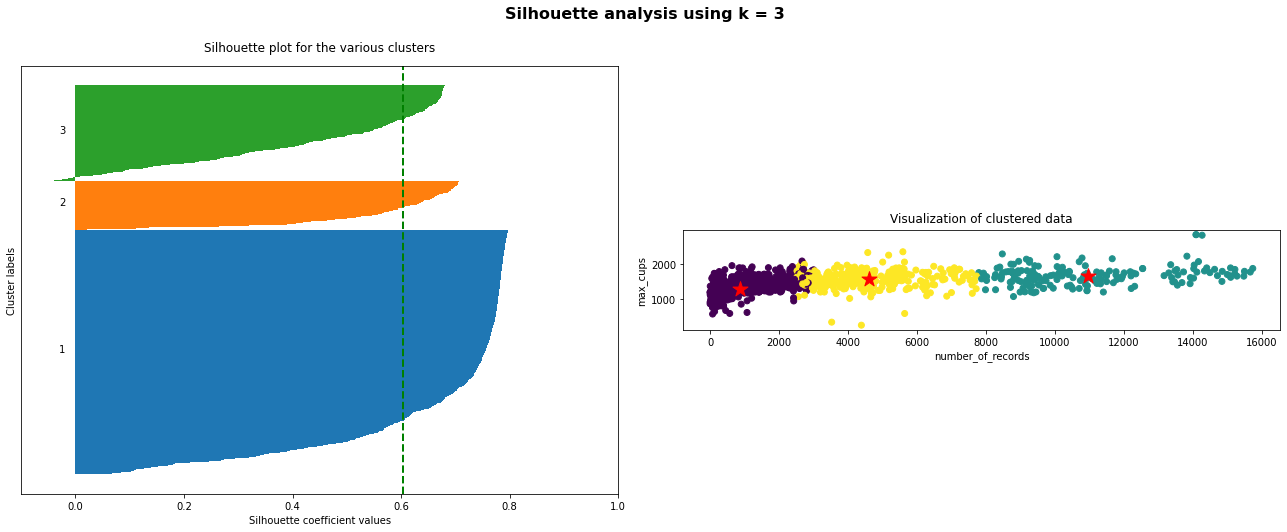

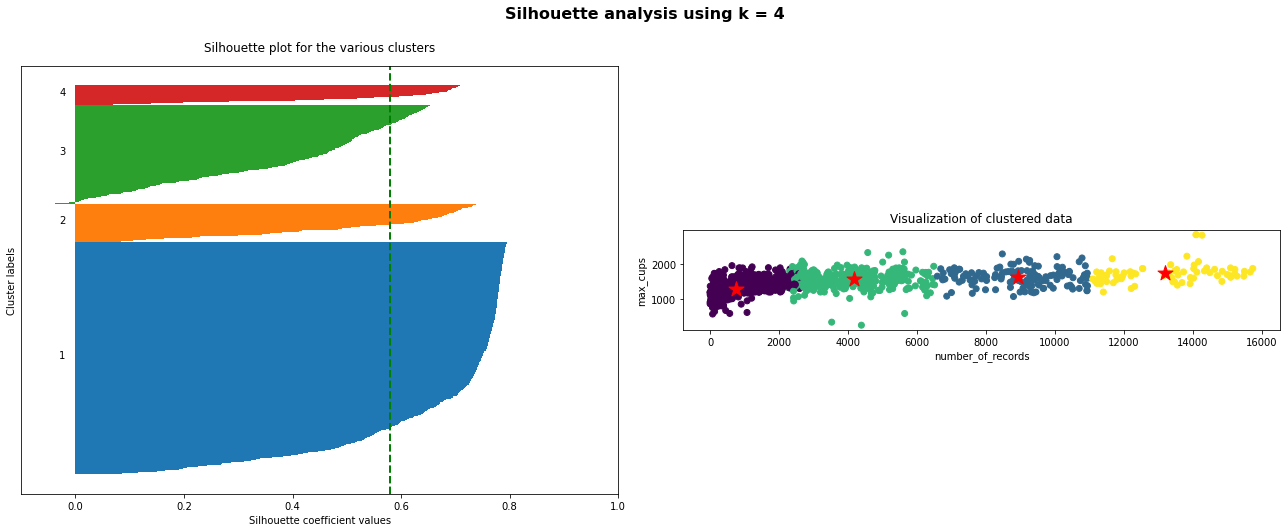

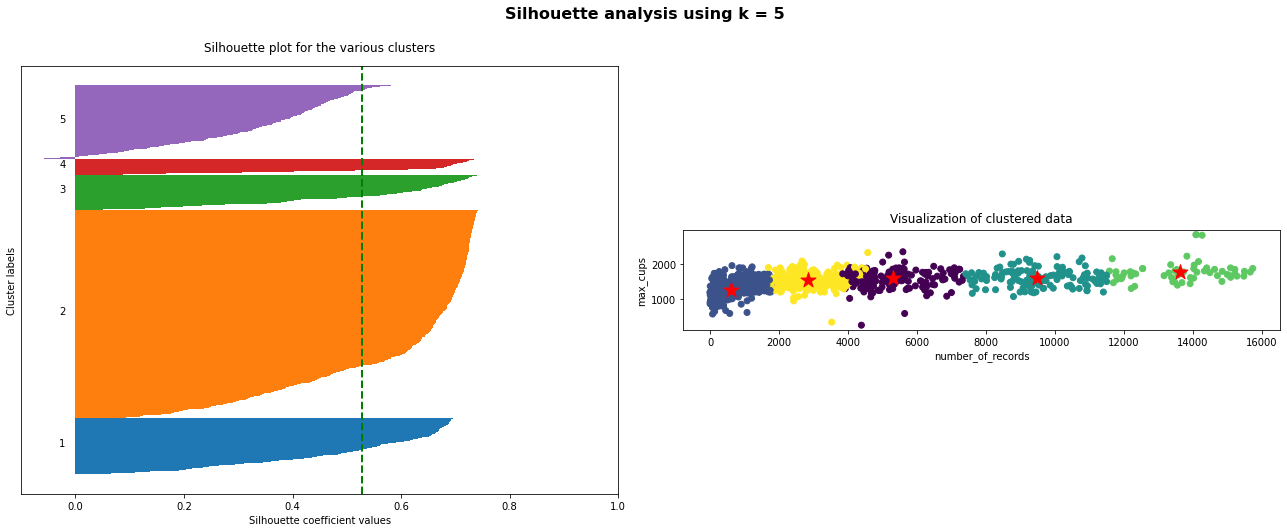

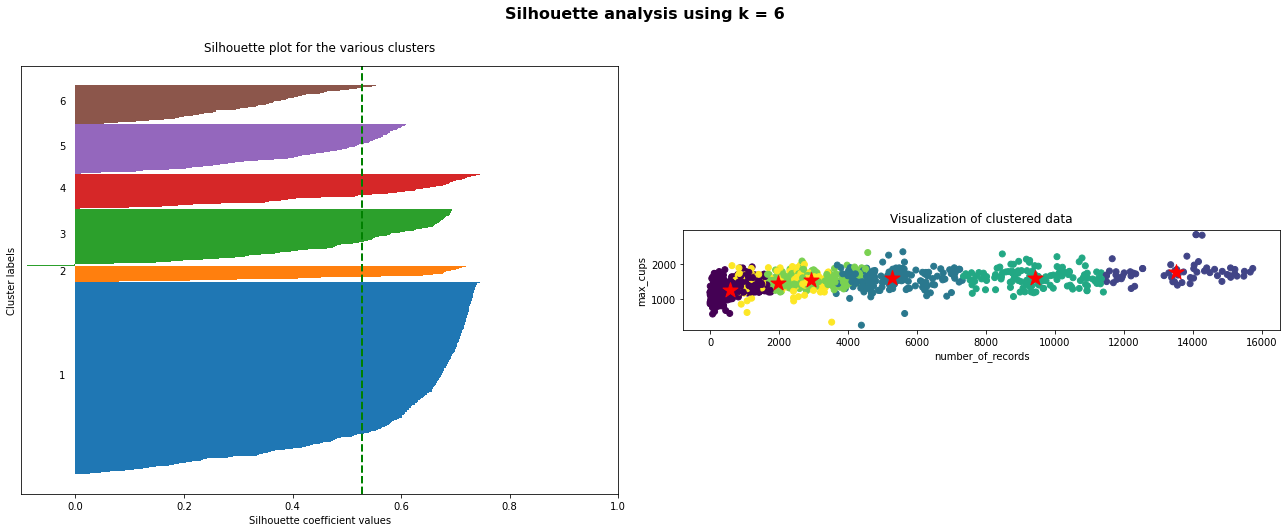

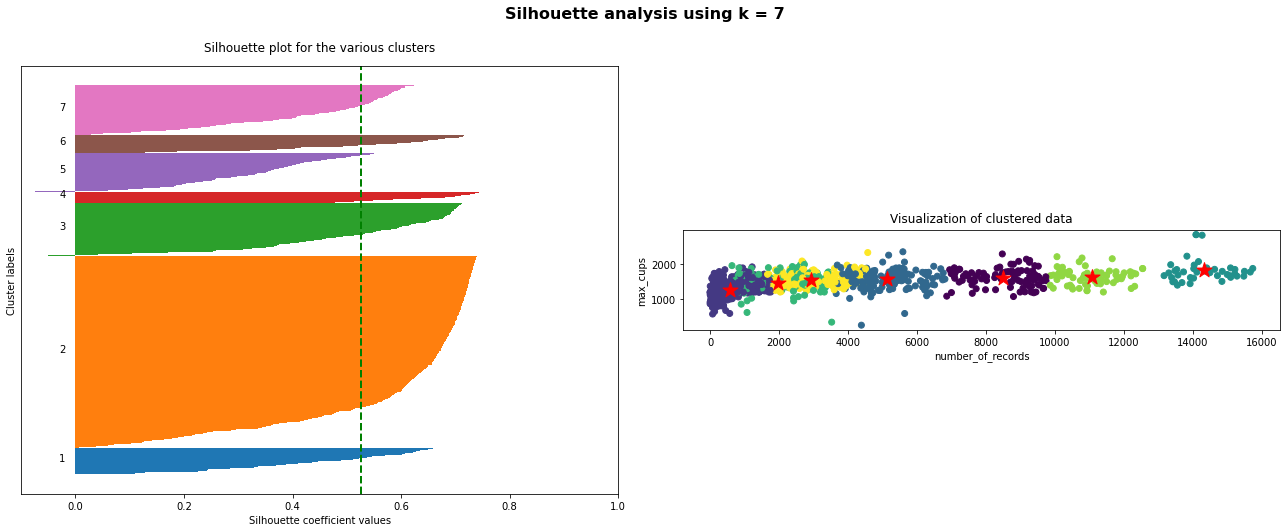

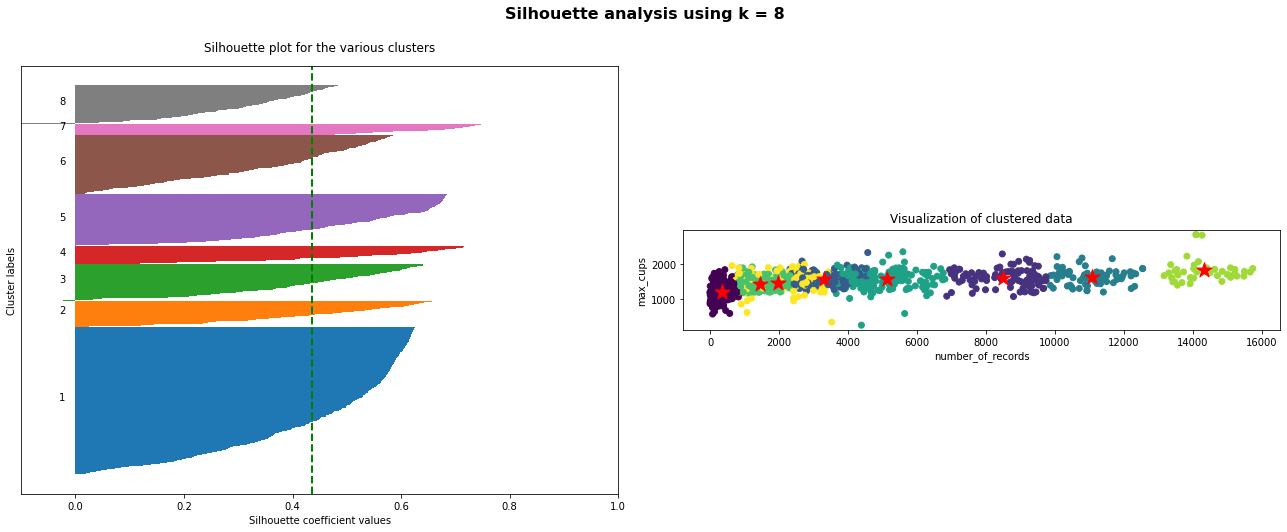

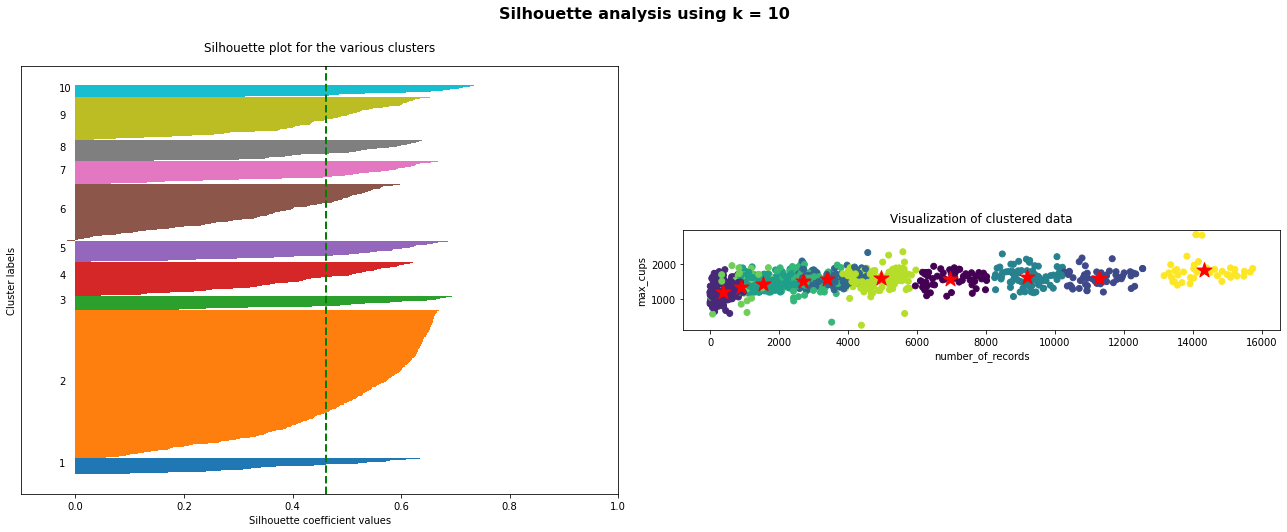

In [ ]:
# Aca ponen el Dataset con el que quieren trabajar
X_std = df_ratings.values
# Aca definen la lista de ks para los cuales quieren hacer un gráfico
lista_k = [2, 3, 4, 5 ,6, 7,8, 10]

for i, k in tqdm(enumerate(lista_k)):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    
    # Run the Kmeans algorithm
    km = KMeans(n_clusters=k)
    labels = km.fit_predict(X_std)
    centroids = km.cluster_centers_

    # Get silhouette samples
    silhouette_vals = silhouette_samples(X_std, labels)

    # Silhouette plot
    y_ticks = []
    y_lower, y_upper = 0, 0
    for i, cluster in enumerate(np.unique(labels)):
        cluster_silhouette_vals = silhouette_vals[labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
        ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
        y_lower += len(cluster_silhouette_vals)

    # Get the average silhouette score and plot it
    avg_score = np.mean(silhouette_vals)
    ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
    ax1.set_yticks([])
    ax1.set_xlim([-0.1, 1])
    ax1.set_xlabel('Silhouette coefficient values')
    ax1.set_ylabel('Cluster labels')
    ax1.set_title('Silhouette plot for the various clusters', y=1.02);
    
    # Scatter plot of data colored with labels
    ax2.scatter(X_std[:, 0], X_std[:, 3], c=labels)
    ax2.scatter(centroids[:, 0], centroids[:, 3], marker='*', c='r', s=250)
    #ax2.set_xlim([-12, 12])
    #ax2.set_xlim([-12, 12])
    ax2.set_xlabel('number_of_records')
    ax2.set_ylabel('max_cups')
    ax2.set_title('Visualization of clustered data', y=1.02)
    ax2.set_aspect('equal')
    plt.tight_layout()
    plt.suptitle(f'Silhouette analysis using k = {k}',
                 fontsize=16, fontweight='semibold', y=1.05);

Si observamos la gráfica del análisis de la silueta para k=3, se obtuvo un coeficiente promedio de siluette de aproximadamente 0,6. Además, para este numero de clusters, vemos que las columnas de cada cluster son bastantes similares entre sí, a diferencia de lo que se observa para k=2, en donde existe una diferencia entre ambos clusters a pesar de que su coeficiente promedio sea mayor a 0,6.

Por lo explicado en el parrafo anterior, tomamos la decisión de entrenar el modelo de K medias con k=3. Con este valor nos aseguramos de que cada observación se encuentra lo más lejos posible de los clústers vecinos.

**(2) Entrenar el modelo de K medias.**

In [ ]:
# Número de clusters buscado
n_clust = 3

km = KMeans(n_clusters=n_clust, random_state=42)
km.fit(df_ratings) #utiliza todas las habilidades: 34 dimensiones

# Etiquetas asignadas por el algoritmo
clusters = km.labels_
#print('Suma de los cuadrados de las distancias al centro de cada cluster=Inertia= ', km.inertia_)

In [ ]:
df_clusters=df.copy()
df_clusters['kmeans_3'] = km.labels_ #clusters
print('Kmeans encontró: ', max(km.labels_)+1, 'clusters, nosotros forzamos la cantidad')
df_clusters.head(4)

Kmeans encontró:  3 clusters, nosotros forzamos la cantidad


,id,number_of_records,has_studies,country,gender,state,year_of_birth,min_cups,mean_cups,max_cups,first_cup,last_cup,age_aprox,kmeans_3
0,Player-1,868,t,Venezuela,Hombre,Miranda,1997.0,1019,1100.533410,1211,1052,1105,25.0,0
1,Player-2,4199,t,Venezuela,Hombre,Miranda,2003.0,1027,1296.185520,1559,1226,1322,19.0,2
2,Player-3,7243,t,Argentina,Hombre,Chubut,1996.0,0,1205.839431,1859,0,1511,26.0,2
3,Player-4,1326,t,Venezuela,Hombre,Anzoategui,1996.0,752,1003.906486,1221,883,1079,26.0,0


In [ ]:
#Eligo dos números entre 0 y  de n_skills-1
rating_1=ratings[0]
rating_2=ratings[3]

In [ ]:
kmean_clusters = go.Scatter(x=df_ratings[rating_1], y=df_ratings[rating_2],
                           mode='markers',
                        text=df.loc[:,'country'],
                           marker=dict(
                                size=5,
                                color = clusters.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )


data=[kmean_clusters]

layout = go.Layout(title="Clustering K means ",titlefont=dict(size=20),
                xaxis=dict(title=rating_1),
                yaxis=dict(title=rating_2),
                autosize=False, width=1000,height=650)

fig = go.Figure(data=data, layout=layout)

**(3) Visualizar los resultados e interpretarlos.**

In [ ]:
#En Colab:
fig.show(renderer="colab")

Del gráfico anterior, podemos identificar los tres cluster definidos con anterioridad. El grupo de color azul esta conformados por jugadores con un número de registros bajos, el grupo de color rojo por jugadores con un número de regitros promedio y el grupo de color amarillo por los jugadores que más veces estuvieron activos en el juego.

A continuación, analizamos cada cluster por separado:

*Grupo azul*

In [ ]:
#Grupo azul
print(df_clusters[df_clusters["kmeans_3"]==0].country.value_counts())
print(df_clusters[df_clusters["kmeans_3"]==0].country.value_counts(normalize=True))

Argentina      508
Venezuela      355
Colombia         7
Uruguay          5
Costa Rica       4
España           4
Peru             4
Ecuador          3
Cuba             3
Mexico           2
Chile            2
Bolivia          2
Philippines      2
Name: country, dtype: int64
Argentina      0.563818
Venezuela      0.394007
Colombia       0.007769
Uruguay        0.005549
Costa Rica     0.004440
España         0.004440
Peru           0.004440
Ecuador        0.003330
Cuba           0.003330
Mexico         0.002220
Chile          0.002220
Bolivia        0.002220
Philippines    0.002220
Name: country, dtype: float64


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text major ticklabel objects>)

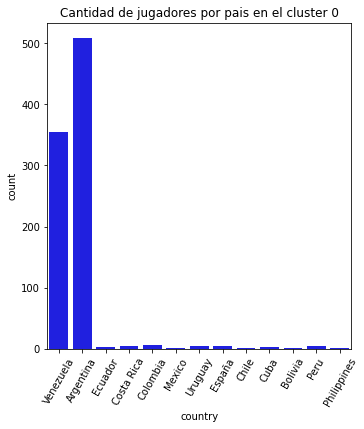

In [ ]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
seaborn.countplot(df_clusters[df_clusters["kmeans_3"]==0].country, color="blue")
plt.title('Cantidad de jugadores por pais en el cluster 0')
plt.xticks(rotation=60)

En cuanto a la nacionalidad de los jugadores que conforman este grupo podemos decir que el 56% (508 jugadores) de ellos son de Argentina, el 39% (355 jugadores) de Venezuela y el 5% de los restantes paises. 

*Grupo amarillo*

In [ ]:
#Grupo amarillo
print(df_clusters[df_clusters["kmeans_3"]==1].country.value_counts())
print(df_clusters[df_clusters["kmeans_3"]==1].country.value_counts(normalize=True))

Argentina    136
Venezuela     43
Name: country, dtype: int64
Argentina    0.759777
Venezuela    0.240223
Name: country, dtype: float64


(array([0, 1]), <a list of 2 Text major ticklabel objects>)

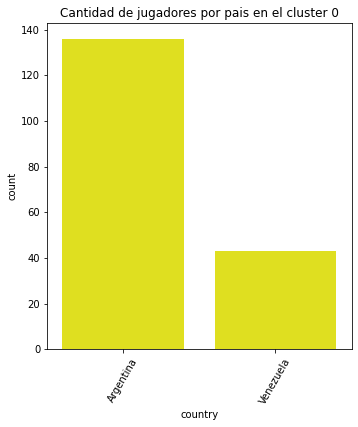

In [ ]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
seaborn.countplot(df_clusters[df_clusters["kmeans_3"]==1].country, color="yellow")
plt.title('Cantidad de jugadores por pais en el cluster 0')
plt.xticks(rotation=60)

En cuanto a la nacionalidad de los jugadores que conforman el cluster (1), podemos afirmar que el 76% (136 jugadores) de ellos son de Argentina y el 24% (43 jugadores) de Venezuela. **Recordemos que este grupo esta representado por los jugadores más "dedicados" al juego en cuestión.**

*Grupo rojo*

In [ ]:
#Grupo rojo
print(df_clusters[df_clusters["kmeans_3"]==2].country.value_counts())
print(df_clusters[df_clusters["kmeans_3"]==2].country.value_counts(normalize=True))

Argentina      209
Venezuela      134
Philippines      6
Peru             2
Ecuador          1
Name: country, dtype: int64
Argentina      0.593750
Venezuela      0.380682
Philippines    0.017045
Peru           0.005682
Ecuador        0.002841
Name: country, dtype: float64


(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

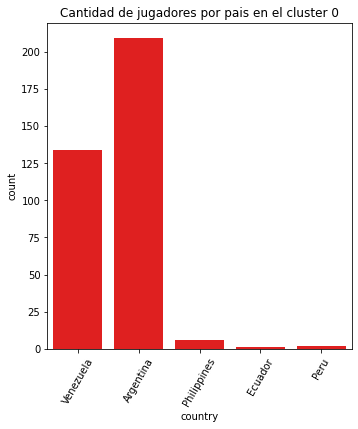

In [ ]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
seaborn.countplot(df_clusters[df_clusters["kmeans_3"]==2].country, color="red")
plt.title('Cantidad de jugadores por pais en el cluster 0')
plt.xticks(rotation=60)

En lo que respecta al gurpo N°2, al igual que en los grupos anteriores hay una predominancia de jugadores argentinos (59%) con respecto a los jugadores de otras nacionalidades (Venezuela, Filipinas, Ecuador y Perú).

##Sección 2: Otros algoritmos de clusterización

**(1) Elegir otro algoritmo de clusterización, grafique y compare resultados.**

**Clustering-Mean-Shift**

* NO es necesario definirle la cantidad de grupos/clusters
* NO es escalable, computacionalmente es muy pesado. Cada dato tienen un proceso iterativo en donde en cada iteración considera los vecinos a menos de un radio de distancia.
* Hipeparámetros: radio/bandwith (de cobertura para cálculo de media).

Para el cálculo del ancho de banda (bandwith), aplicamos el siguiente código:

In [ ]:
import sklearn
bandwith= sklearn.cluster.estimate_bandwidth(df_ratings, quantile=0.25, random_state=42)

In [ ]:
bandwith

2094.5537755693995

Se obtuvo un bandwith de 2094. Este valor alimentará a nuestro algoritmo de Mean shift. 

In [ ]:
ms = MeanShift(bandwidth=bandwith, bin_seeding=True)

ms.fit(df_ratings)

clusters2 = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(clusters2)
n_clusters_ = len(labels_unique)

print("Cantidad de clusters encontrados por Mean Shift : %d" % n_clusters_)

Cantidad de clusters encontrados por Mean Shift : 3


In [ ]:
df_clusters2=df.copy()
df_clusters2['mean_shift'] = ms.labels_ #clusters
print('Kmeans encontró: ', max(ms.labels_)+1, 'clusters, nosotros forzamos la cantidad')
df_clusters2.head(4)

Kmeans encontró:  3 clusters, nosotros forzamos la cantidad


,id,number_of_records,has_studies,country,gender,state,year_of_birth,min_cups,mean_cups,max_cups,first_cup,last_cup,age_aprox,mean_shift
0,Player-1,868,t,Venezuela,Hombre,Miranda,1997.0,1019,1100.533410,1211,1052,1105,25.0,0
1,Player-2,4199,t,Venezuela,Hombre,Miranda,2003.0,1027,1296.185520,1559,1226,1322,19.0,0
2,Player-3,7243,t,Argentina,Hombre,Chubut,1996.0,0,1205.839431,1859,0,1511,26.0,1
3,Player-4,1326,t,Venezuela,Hombre,Anzoategui,1996.0,752,1003.906486,1221,883,1079,26.0,0


**(2) Visualizar e interpretar resultados.**

In [ ]:
data=[]
MeanShift_clusters = go.Scatter(x=df_ratings[rating_1], y=df_ratings[rating_2],
                           mode='markers',
                        text=df.loc[:,'state'],
                           marker=dict(
                                size=5,
                                color = clusters2.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )


data=[MeanShift_clusters]

layout = go.Layout(title="Mean Shift",titlefont=dict(size=20),
                xaxis=dict(title=rating_1),
                yaxis=dict(title=rating_2),
                autosize=False, width=1000,height=650)

fig = go.Figure(data=data, layout=layout)

In [ ]:
#En Colab
fig.show(renderer="colab")

Aplicando el algoritmo de Mean Shift, identificamos nuevamente  tres clusters. El grupo de color azul esta conformado por jugadores con un número de registros bajo, el grupo de color amarillo por jugadores con un número de regitros promedio y el grupo de color rojo por los jugadores que más veces estuvieron activos en el juego.

A continuación, analizamos cada cluster por separado:

*Grupo rojo*

In [ ]:
#Grupo rojo
print(df_clusters2[df_clusters2["mean_shift"]==2].country.value_counts())
print(df_clusters2[df_clusters2["mean_shift"]==2].country.value_counts(normalize=True))

Argentina    55
Venezuela     7
Name: country, dtype: int64
Argentina    0.887097
Venezuela    0.112903
Name: country, dtype: float64


(array([0, 1]), <a list of 2 Text major ticklabel objects>)

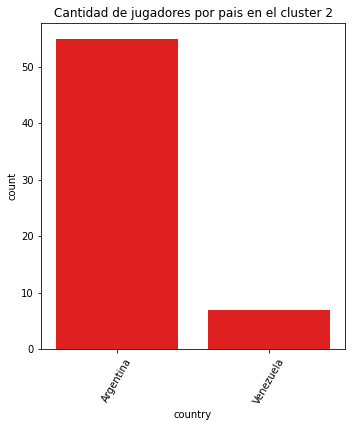

In [ ]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
seaborn.countplot(df_clusters2[df_clusters2["mean_shift"]==2].country, color="red")
plt.title('Cantidad de jugadores por pais en el cluster 2')
plt.xticks(rotation=60)

Con respecto a la nacionalidad de los jugadores que conforman el cluster (2), podemos afirmar que el 89% (55 jugadores) de ellos son de Argentina y el 11% (43 jugadores) de Venezuela. **Recordemos que este grupo esta representado por los jugadores más "dedicados" al juego en cuestión.**

*Grupo amarillo*

In [ ]:
#Grupo amarillo
print(df_clusters2[df_clusters2["mean_shift"]==1].country.value_counts())
print(df_clusters2[df_clusters2["mean_shift"]==1].country.value_counts(normalize=True))

Argentina      163
Venezuela       93
Philippines      3
Peru             1
Name: country, dtype: int64
Argentina      0.626923
Venezuela      0.357692
Philippines    0.011538
Peru           0.003846
Name: country, dtype: float64


(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

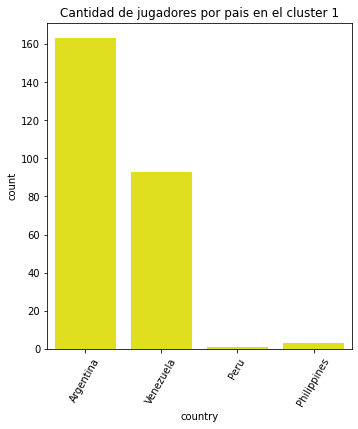

In [ ]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
seaborn.countplot(df_clusters2[df_clusters2["mean_shift"]==1].country, color="yellow")
plt.title('Cantidad de jugadores por pais en el cluster 1')
plt.xticks(rotation=60)

In [ ]:
#Grupo azul
print(df_clusters2[df_clusters2["mean_shift"]==0].country.value_counts())
print(df_clusters2[df_clusters2["mean_shift"]==0].country.value_counts(normalize=True))

Argentina      635
Venezuela      432
Colombia         7
Philippines      5
Uruguay          5
Peru             5
Ecuador          4
Costa Rica       4
España           4
Cuba             3
Mexico           2
Chile            2
Bolivia          2
Name: country, dtype: int64
Argentina      0.572072
Venezuela      0.389189
Colombia       0.006306
Philippines    0.004505
Uruguay        0.004505
Peru           0.004505
Ecuador        0.003604
Costa Rica     0.003604
España         0.003604
Cuba           0.002703
Mexico         0.001802
Chile          0.001802
Bolivia        0.001802
Name: country, dtype: float64


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text major ticklabel objects>)

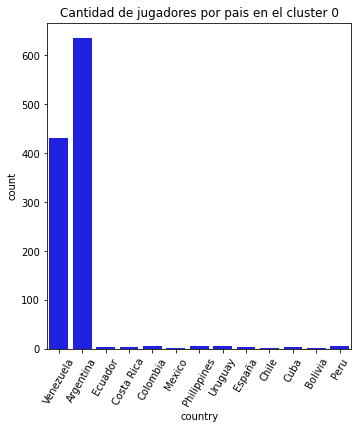

In [ ]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
seaborn.countplot(df_clusters2[df_clusters2["mean_shift"]==0].country, color="blue")
plt.title('Cantidad de jugadores por pais en el cluster 0')
plt.xticks(rotation=60)

##Sección 3: Conclusiones

**(1) Comparar los rendimientos de los algoritmos utilizados.**

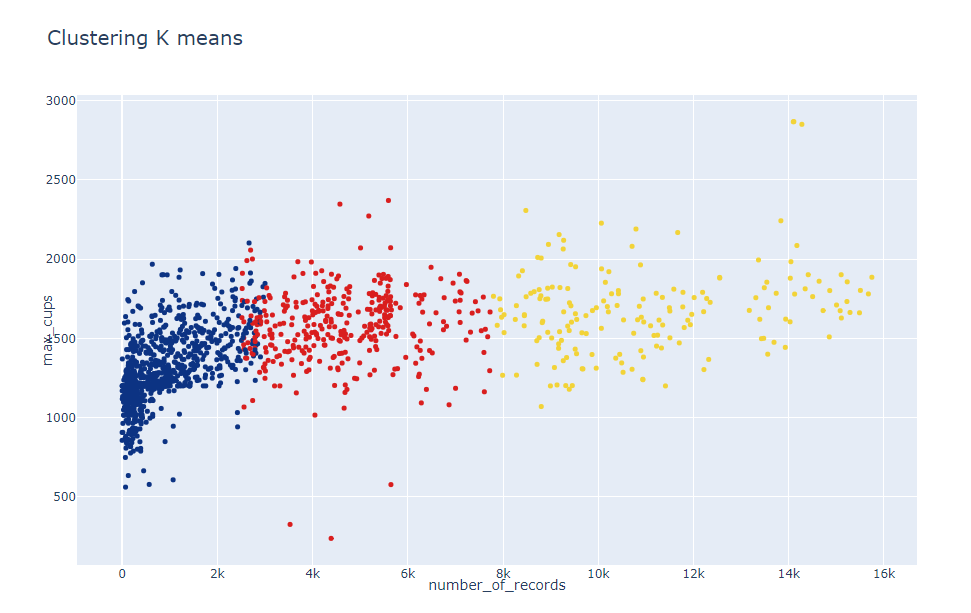

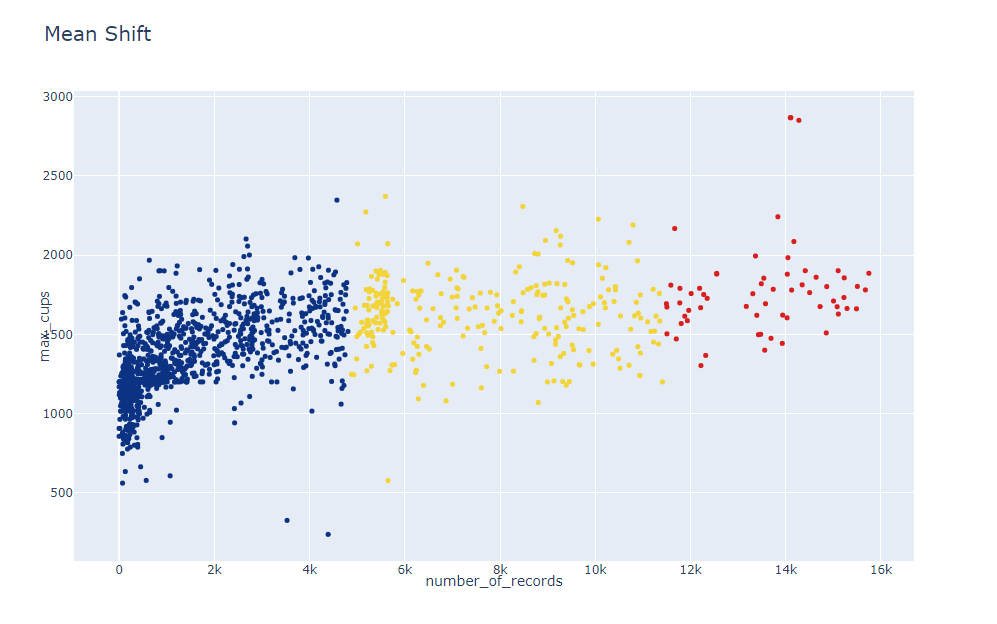

Comparando ambos métodos, se observa que:


*   Con el método K_means: Cada observación se encuentra cerca de las observaciones de un mismo cluster. Sin embargo, si nos centramos en la frontera de decisión entre los clusters 0 (azul) y 2 (rojo), podemos observar que algunos puntos de ambos grupos se encuentran cercanos entre sí, lo cual indica que dichas observaciones pueden haber sido agrupadas de manera incorrecta.
*   Con el método Mean_Shift: No se presentan inconvenientes en los que respecta a las cercanias de las observaciones inter-clusters. Pero, si lo comparamos con el algoritmo de K_means, los puntos u observaciones intra_clusters (observaciones dentro de un mismo grupo) se encuentran con una distancia de separación mayor.



**(2) ¿Se puede decir que hay distintos grupos de jugadores? ¿Cómo se caracterizan?**

**Analisis de los jugadores nacidos en Argentina**

Conteo de jugadores argentinos en el primer cluster, conformado por aquellos jugadores con menor cantidad de registro en el juego. Aproximadamente entre 1 y 3000 registros correspondiente al algoritmo de K_means y entre 1 y 4800 con el método de Mean_shift. 
En ambos casos corresponden al cluster asignado con el numero cero (0).

***Método k means***

Text(0.5, 1.0, 'Clustering K_means')

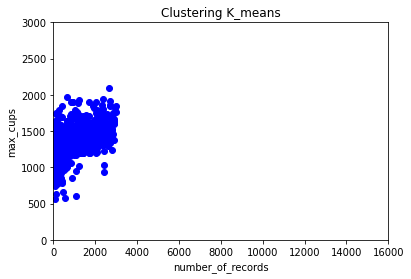

In [ ]:
plt.scatter(data=df_clusters[df_clusters["kmeans_3"]==0], x=rating_1, y=rating_2, color="blue")
plt.xlim(0,16000)
plt.ylim(0,3000)
plt.xlabel("number_of_records")
plt.ylabel("max_cups")
plt.title("Clustering K_means")



In [ ]:
#Grupo azul (K-means) (Buenos aires)
df_clusters[(df_clusters["kmeans_3"]==0) & (df_clusters["state"]=="Buenos Aires")].id.nunique()

288

In [ ]:
#Grupo azul (K-means) (Interior)
df_clusters[(df_clusters["kmeans_3"]==0) & (df_clusters["state"]!="Buenos Aires") & (df_clusters["country"]=="Argentina")].id.nunique()

222

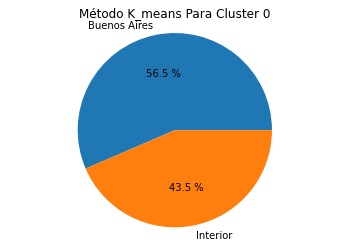

In [ ]:
import matplotlib.pyplot as plt

k_means_0 = [288,222]
nombres = ["Buenos Aires","Interior"]
plt.pie(k_means_0, labels=nombres, autopct="%0.1f %%")
plt.axis("equal")
plt.title("Método K_means Para Cluster 0")
plt.show()

***Método mean shift***

Text(0.5, 1.0, 'Clustering Mean_shift')

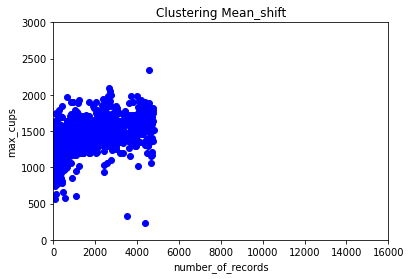

In [ ]:
plt.scatter(data=df_clusters2[df_clusters2["mean_shift"]==0], x=rating_1, y=rating_2, color="blue")
plt.xlim(0,16000)
plt.ylim(0,3000)
plt.xlabel("number_of_records")
plt.ylabel("max_cups")
plt.title("Clustering Mean_shift")

In [ ]:
#Grupo azul (mean shift) (Buenos aires)
df_clusters2[(df_clusters2["mean_shift"]==0) & (df_clusters2["state"]=="Buenos Aires")].id.nunique()

359

In [ ]:
#Grupo azul (mean shift) (Interior)
df_clusters2[(df_clusters2["mean_shift"]==0) & (df_clusters2["state"]!="Buenos Aires") & (df_clusters2["country"]=="Argentina")].id.nunique()

278

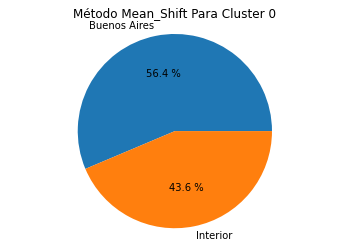

In [ ]:
import matplotlib.pyplot as plt

mean_shift_0 = [359,278]
nombres = ["Buenos Aires","Interior"]
plt.pie(mean_shift_0, labels=nombres, autopct="%0.1f %%")
plt.axis("equal")
plt.title("Método Mean_Shift Para Cluster 0")
plt.show()

Conteo de jugadores argentinos en el segundo cluster, conformado por aquellos jugadores con una cantidad media de registros en el juego. Aproximadamente entre 2500 y 7700 registros correspondiente al algoritmo de K_means y entre 4800 y 11400 con el método de Mean_shift. 

Aclaración: aplicando el algoritmo de k_means se le asigno a este grupo la etiqueta 2 y para el metodo de mean_shift el número 1.

***Método k means***

Text(0.5, 1.0, 'Clustering K_means')

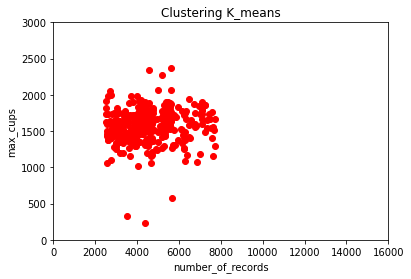

In [ ]:
plt.scatter(data=df_clusters[df_clusters["kmeans_3"]==2], x=rating_1, y=rating_2, color="red")
plt.xlim(0,16000)
plt.ylim(0,3000)
plt.xlabel("number_of_records")
plt.ylabel("max_cups")
plt.title("Clustering K_means")

In [ ]:
#Grupo amarillo (K-means) (Buenos aires)
df_clusters[(df_clusters["kmeans_3"]==2) & (df_clusters["state"]=="Buenos Aires")].id.nunique()

116

In [ ]:
#Grupo amarillo (K-means) (Interior)
df_clusters[(df_clusters["kmeans_3"]==2) & (df_clusters["state"]!="Buenos Aires") & (df_clusters["country"]=="Argentina")].id.nunique()

93

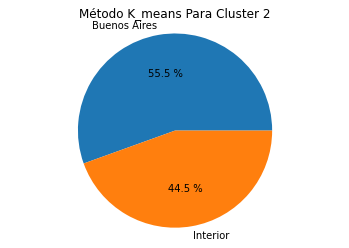

In [ ]:
import matplotlib.pyplot as plt

k_means_2 = [116,93]
nombres = ["Buenos Aires","Interior"]
plt.pie(k_means_2, labels=nombres, autopct="%0.1f %%")
plt.axis("equal")
plt.title("Método K_means Para Cluster 2")
plt.show()

***Método mean shift***

Text(0.5, 1.0, 'Clustering Mean_shift')

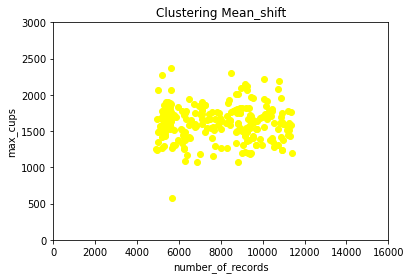

In [ ]:
plt.scatter(data=df_clusters2[df_clusters2["mean_shift"]==1], x=rating_1, y=rating_2, color="yellow")
plt.xlim(0,16000)
plt.ylim(0,3000)
plt.xlabel("number_of_records")
plt.ylabel("max_cups")
plt.title("Clustering Mean_shift")

In [ ]:
#Grupo amarillo (mean shift) (Buenos aires)
df_clusters2[(df_clusters2["mean_shift"]==1) & (df_clusters2["state"]=="Buenos Aires")].id.nunique()

94

In [ ]:
#Grupo amarillo (mean shift) (Interior)
df_clusters2[(df_clusters2["mean_shift"]==1) & (df_clusters2["state"]!="Buenos Aires") & (df_clusters2["country"]=="Argentina")].id.nunique()

69

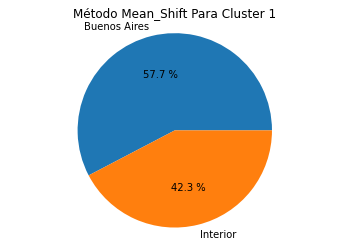

In [ ]:
import matplotlib.pyplot as plt

mean_shift_1 = [94,69]
nombres = ["Buenos Aires","Interior"]
plt.pie(mean_shift_1, labels=nombres, autopct="%0.1f %%")
plt.axis("equal")
plt.title("Método Mean_Shift Para Cluster 1")
plt.show()

Conteo de jugadores argentinos en el tercer cluster, conformado por aquellos jugadores con la mayor cantidad de registros en el juego. Aproximadamente entre 7800 y 15746 registros correspondiente al algoritmo de K_means y entre 11400 y 15746 con el método de Mean_shift.

Aclaración: aplicando el algoritmo de k_means se le asigno a este grupo la etiqueta 1 y para el metodo de mean_shift el número 2.

***Método k means***

Text(0.5, 1.0, 'Clustering K_means')

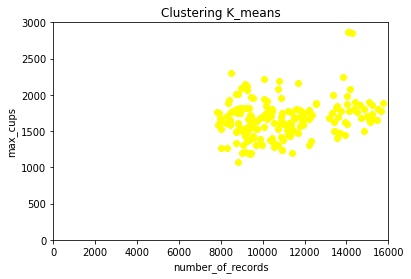

In [ ]:
plt.scatter(data=df_clusters[df_clusters["kmeans_3"]==1], x=rating_1, y=rating_2, color="yellow")
plt.xlim(0,16000)
plt.ylim(0,3000)
plt.xlabel("number_of_records")
plt.ylabel("max_cups")
plt.title("Clustering K_means")

In [ ]:
#Grupo Rojo (K-means) (Buenos aires)
df_clusters[(df_clusters["kmeans_3"]==1) & (df_clusters["state"]=="Buenos Aires")].id.nunique()

65

In [ ]:
#Grupo rojo (K-means) (Interior)
df_clusters[(df_clusters["kmeans_3"]==1) & (df_clusters["state"]!="Buenos Aires") & (df_clusters["country"]=="Argentina")].id.nunique()

71

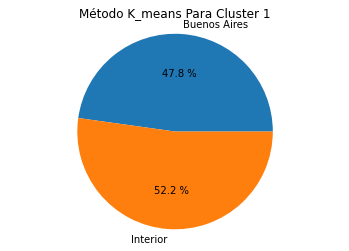

In [ ]:
import matplotlib.pyplot as plt

k_means_1 = [65,71]
nombres = ["Buenos Aires","Interior"]
plt.pie(k_means_1, labels=nombres, autopct="%0.1f %%")
plt.axis("equal")
plt.title("Método K_means Para Cluster 1")
plt.show()

***Método mean shift***

Text(0.5, 1.0, 'Clustering Mean_shift')

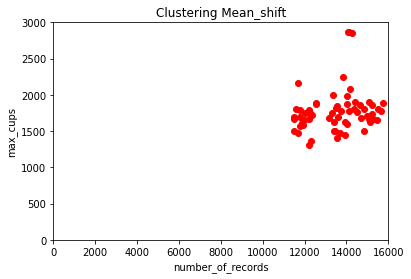

In [ ]:
plt.scatter(data=df_clusters2[df_clusters2["mean_shift"]==2], x=rating_1, y=rating_2, color="red")
plt.xlim(0,16000)
plt.ylim(0,3000)
plt.xlabel("number_of_records")
plt.ylabel("max_cups")
plt.title("Clustering Mean_shift")

In [ ]:
#Grupo rojo (mean shift) (Buenos aires)
df_clusters2[(df_clusters2["mean_shift"]==2) & (df_clusters2["state"]=="Buenos Aires")].id.nunique()

16

In [ ]:
#Grupo rojo (mean shift) (Interior)
df_clusters2[(df_clusters2["mean_shift"]==2) & (df_clusters2["state"]!="Buenos Aires") & (df_clusters2["country"]=="Argentina")].id.nunique()

39

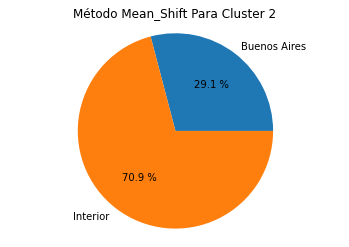

In [ ]:
import matplotlib.pyplot as plt

mean_shift_2 = [16,39]
nombres = ["Buenos Aires","Interior"]
plt.pie(mean_shift_2, labels=nombres, autopct="%0.1f %%")
plt.axis("equal")
plt.title("Método Mean_Shift Para Cluster 2")
plt.show()

Observando el grupo de los jugadores con más registros en el juego, este se encuentra conformado en su totalidad por venezolanos y argentinos. La cantidad de jugadores argentinos supera ampliamente a los jugadores venezolanos. 
Luego de realizar una comparación entre los jugadores de Argentina que viven en Buenos aires (provincia) y el resto del país, aplicando ambos métodos de clusterización, llegamos a la conclusión de que hay menos jugadores de Bs. As. que del resto del país.

**Analisis de los jugadores por sus edades**

Para realizar este análisis, se definiran tres rango de edades:


*   Jugadores entre 18 y 25 años.
*   Jugadores entre 25 y 40 años.
*   Jugadores mayores de 40 años.



**Cluster de jugadores con número de registros bajo**

In [ ]:
#Grupo azul (K-means) (Entre 18 y 30 años)
df_clusters[(df_clusters["kmeans_3"]==0) & (df_clusters["age_aprox"]>18) & (df_clusters["age_aprox"]<=25)].id.nunique()

550

In [ ]:
df_clusters[(df_clusters["kmeans_3"]==0) & (df_clusters["age_aprox"]>25) & (df_clusters["age_aprox"]<=40)].id.nunique()

312

In [ ]:
df_clusters[(df_clusters["kmeans_3"]==0) & (df_clusters["age_aprox"]>40)].id.nunique()

30

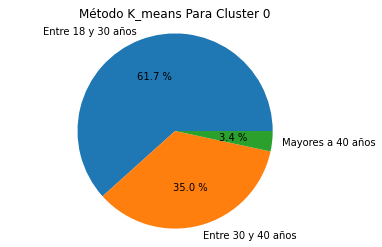

In [ ]:
import matplotlib.pyplot as plt

mean_shift_0 = [550,312,30]
nombres = ["Entre 18 y 30 años","Entre 30 y 40 años","Mayores a 40 años"]
plt.pie(mean_shift_0, labels=nombres, autopct="%0.1f %%")
plt.axis("equal")
plt.title("Método K_means Para Cluster 0")
plt.show()

**Cluster de jugadores con número de registros promedio**

In [ ]:
df_clusters[(df_clusters["kmeans_3"]==2) & (df_clusters["age_aprox"]>18) & (df_clusters["age_aprox"]<=25)].id.nunique()


222

In [ ]:
df_clusters[(df_clusters["kmeans_3"]==2) & (df_clusters["age_aprox"]>25) & (df_clusters["age_aprox"]<=40)].id.nunique()

125

In [ ]:
df_clusters[(df_clusters["kmeans_3"]==2) & (df_clusters["age_aprox"]>40)].id.nunique()

4

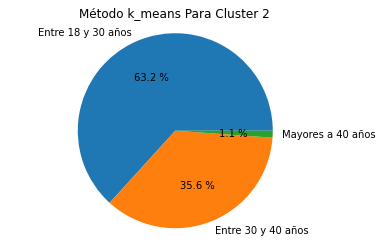

In [ ]:
import matplotlib.pyplot as plt

mean_shift_2 = [222,125,4]
nombres = ["Entre 18 y 30 años","Entre 30 y 40 años","Mayores a 40 años"]
plt.pie(mean_shift_2, labels=nombres, autopct="%0.1f %%")
plt.axis("equal")
plt.title("Método k_means Para Cluster 2")
plt.show()

**Cluster de jugadores con más cantidad de registros**

In [ ]:
df_clusters[(df_clusters["kmeans_3"]==1) & (df_clusters["age_aprox"]>18) & (df_clusters["age_aprox"]<=25)].id.nunique()

125

In [ ]:
df_clusters[(df_clusters["kmeans_3"]==1) & (df_clusters["age_aprox"]>25) & (df_clusters["age_aprox"]<=40)].id.nunique()

51

In [ ]:
df_clusters[(df_clusters["kmeans_3"]==1) & (df_clusters["age_aprox"]>40)].id.nunique()

2

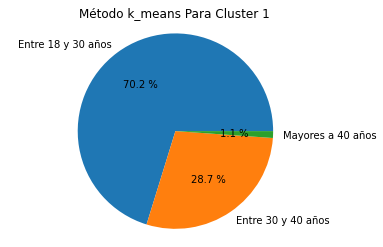

In [ ]:
import matplotlib.pyplot as plt

mean_shift_1 = [125,51,2]
nombres = ["Entre 18 y 30 años","Entre 30 y 40 años","Mayores a 40 años"]
plt.pie(mean_shift_1, labels=nombres, autopct="%0.1f %%")
plt.axis("equal")
plt.title("Método k_means Para Cluster 1")
plt.show()

**(3) Dar conclusiones finales del análisis hecho con el dataset, integrando los conocimientos descubiertos en los
análisis anteriores.**

# Conclusiones del proyecto:

**Etapa 1: Analisis y visualización de datos:**

* El dataset original estaba conformado con 4404492 observaciones y 8 atributos (id, datetime, has_studies, gender, country, state, age y cups).
* Se detecto que en este dataset se almacenaba el instante de tiempo en el que jugador estaba activo en la variable "datetime" y la cantidad de copas que tenia el jugador en ese instante en la variable "cups", por lo cual cada "id" del jugador se encotraba repetido de acuerdo a la cantidad de veces que se registro su partida. Es por eso que se decidio agruparlo de acuerdo al "id" de tal manera que en cada fila se represente a un jugador en particular. Además se generó una nueva variable llamada "number_of_records", que contiene el número de veces que estuvo el jugodor registrado. 
* En el mismo agrupamiento, se adicionaron atributos que guardaban la máxima,  la mínima y el promedio de cantidad de copas obtenidas en el transcurso del juego, como asi también la cantidad de copas con las que comenzó el juego y la cantidad de copas que se registraron en la última partida de cada jugador.
* A partir de estas modificaciones se observo habian 1439 jugadores en nuesto dataset modificado.
* Posteriormente, se procedio a la etapa de visualización donde podemos destacar que: 
 * La edad promedio de los jugadores es de 24 años
 * El 89% de las personas registradas en el juego son "Hombres", el 9,7% son "Mujeres" y el 1,3% son de otros generos, personas que decidieron no decirlo y datos nulos.
 * Las personas que llegaron a una máxima cantidad de copas mas alta son hombres y se encuentran estudiando.  
 * Más del 96 % de los jugadores pertenece a Argentina o Venezuela.


**Etapa 2: Exploración y Curación de datos:**

* Cabe destacar que para realizar una correcta visualizacíon de los datos, se habian previamente realizado las siguientes acciones de curación:
  * Se corrigieron las fechas de nacimiento de los jugadores y se decidio crear una variable "age_aprox", que contiene la edad de los jugadores. El cálculo consiste en restar el año actual (2022) con los años de nacimientos (year_of_birth)
  * Los datos mal escritos en los atributos "country" y "state" fueron corregidos de manera minusiosa (ver TPN°2) donde se obtuvo un dataset muy ordenado y prolijo en comparación al brindado con los datos crudos.

* Inicialmente, el dataset contaba con un las siguientes datos faltantes:
  
  * has_studies:     56878
  * gender:          39077
  * country:         39077
  * state:           59086
  * age:             39077

* Una vez aplicados la curación necesaria, se obruvieron los siguientes resultados repecto a los datos nulos:
  * has_studies:     9
  * gender:          7
  * country:         7
  * state:           9
  * age_aprox:       7

* Decidimos eliminar por completo 7 filas del nuevo dataframe curado, ya que al parecer la mayoria de los datos de cada fila es un dato faltante. 
* Imputamos tanto los 2 datos faltantes del atributo "has_studies" como del atributo "state", utilizando la moda de cada feature.


**Etapa 3: Aprendizaje Supervisado:**

* Para el desarrollo de esta etapa del proyecto, se utilizó el dataset previamente analizado y curado de la etapa anterior.
* El objetivo es armar un modelo de machine learning, capaz de predecir si un jugador es bueno o no. Es por eso que definimos como indicador de la "performance" de un jugador a la diferencia entre la máxima copa que obtuvo y la cantidad de copas con las que arrancó el juego. A esta variable la llamaremos "rendimiento". Tomamos esta decisíon ya que puede suceder que jugadores hayan comprado copas al iniciar la partida.

* Para estudiar el desempeño de un buen jugador, nos quedamos con los jugadores con más de 100 registros ya que un jugador puede haber conseguido un alto número de copas en pocos registros, y con eso no podemos ver una regularidad ya que podría ser suerte de principiante. Luego recategorizamos teniendo en cuenta el máximo de copas ganadas, basándonos en ello para asumir el desempeño de los jugadores. Las categorias son: B para jugadores cuyo rendimiento sea menor al rendimiento medio (mal jugador) y A para jugadores cuyo rendimiento sea mayor al rendimiento medio (buen jugador). 

* Las variables de entrada fueron:
  * number_of_records
  * age_aprox
  * has_studies
  * gender
  * country
  * state

* Se dividio el dataset en tres parte:  
 * Train: 80% de los datos
 * Test: 10% de los datos
 * Val: 10% de los datos

* Los modelos seleccionados para entrenar nuestro modelo son:

 * Random Forest
 * Regresión Logística
 * Gradient Boosting  

* El modelo elegido para la clasificación de los jugadores (A: jugadores Buenos, B: jugadores malos) es "XG boost" con los siguientes parámetros (alpha=50, colsample_bytree=0.6, max_depth=2, n_estimators=10, objective='reg:squarederror', random_state=100).
* El accuracy obtenido en el conjunto de validación es del 87%, es decir, que clasifica bastante bien a los features de entrada. Este indicador podria mejorar si contaramos con más datos, en especial en la etapa de entrenamiento del modelo.
* Además, se puede destacar que para los tres modelos, la variable o feature que más influencia o "peso" tuvo en los mismos fue "number_of_records", es decir, el numero de registro de los jugadores.

**Etapa 4: Aprendizaje No Supervisado:**

* Se aplicaron dos algoritmo de clustrización:
  * K_means
  * Mean_Shift
* De ambos métodos se obtuvieron 3 cluster bien definidos:
  * Primer Cluster: Cluster de jugadores con número de registros bajo.
  * Segundo Cluster: Cluster de jugadores con número de registros promedio o normal.
  * Tercer Cluster: Cluster de jugadores con más cantidad de registros.

* El cluster 1 se caraceriza por: 
  * Esta conformado por jugadores de todas las nacionalidades.
  * El 61,7 % tiene un edad entre 18 y 25 años.
  * Para el caso de los jugadores argentinos el 56,4% son de la provincia de Buenos Aires y el 43,6% son del interior. 

* El cluster 2 se caraceriza por: 
  * Esta conformado por jugadores en su mayoria argentinos y venezolanos. También hay pocos casos de jugadores de Filipinas, Ecuador y Perú. 
  * El 63,2 % tiene un edad entre 18 y 25 años.
  * Para el caso de los jugadores argentinos el 55,5% son de la provincia de Buenos Aires y el 44,5% son del interior.

* El cluster 3 se caraceriza por: 
  * Esta conformado por jugadores en su totalidad por argentinos (89%) y venezolanos (11%).  
  * El 70 % tiene un edad entre 18 y 25 años.
  * Para el caso de los jugadores argentinos el 29,1% son de la provincia de Buenos Aires y el 70,9% son del interior, principalmente proveninetes de las provincias de Santa Fé y Córdoba.  


